In [1]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install pylatexenc

In [2]:
# Import libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit import transpile
simulator = AerSimulator()

In [3]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.measure([0, 1], [0, 1])
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()
print("Measurement Results:", counts)
qc.draw('text')



Measurement Results: {'01': 1024}


┌───┐┌─┐
q_0: ┤ X ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
c: 2/══╩═══╩═
       1   0

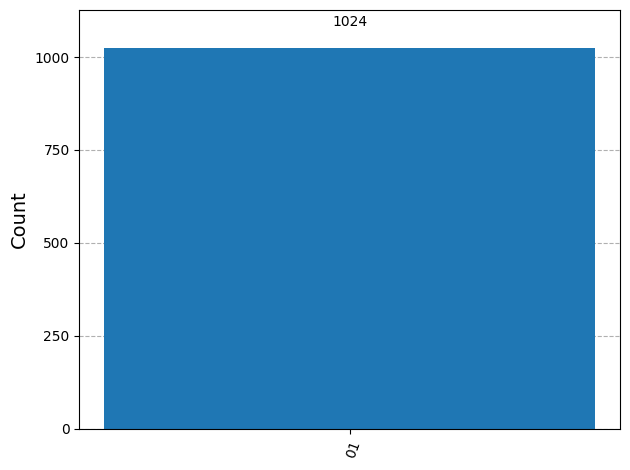

In [4]:
plot_histogram(counts)

# ***TASK 1***

In [5]:
qc1 = QuantumCircuit(2, 2)
qc1.h(0)
qc1.h(1)
qc1.measure([0, 1], [0, 1])
compiled_circuit1 = transpile(qc1, simulator)
job1 = simulator.run(compiled_circuit1, shots=1024)
result1 = job1.result()
counts1 = result1.get_counts()
print("Measurement Results:", counts1)
print("\nCircuit Diagram:")
print(qc1.draw('text'))

Measurement Results: {'11': 262, '00': 256, '10': 234, '01': 272}

Circuit Diagram:
     ┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 


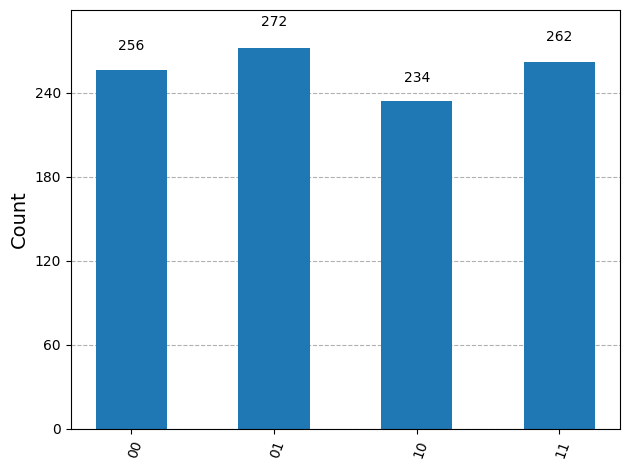

In [6]:
plot_histogram(counts1)

**What pattern do you notice in the histogram?**

The histogram shows all four possible outcomes ('00', '01', '10', and '11') with roughly equal probability (around 25% each, or ~256 shots out of 1024). This is because the combined state is the tensor product of the two individual superpositions:

# ***TASK 2***

In [7]:
qc2 = QuantumCircuit(2, 2)
qc2.x(1)
qc2.measure([0, 1], [0, 1])
compiled_circuit2 = transpile(qc2, simulator)
job2 = simulator.run(compiled_circuit2, shots=1024)
result2 = job2.result()
counts2 = result2.get_counts()
print("Measurement Results:", counts2)
print("\nCircuit Diagram:")
print(qc2.draw('text'))

Measurement Results: {'10': 1024}

Circuit Diagram:
          ┌─┐   
q_0: ─────┤M├───
     ┌───┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 


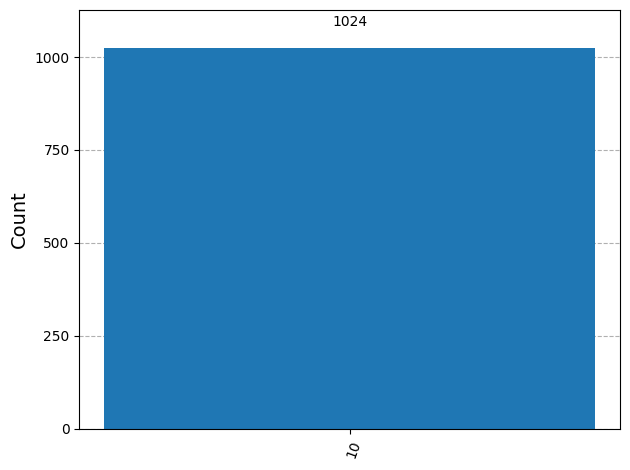

In [8]:
plot_histogram(counts2)

**Comparison with the original circuit:**

The measurement result of original circuit was {'01': 1024}. The measurement result of current circuit is {'10': 1024}.

# ***TASK 3***

In [9]:
qc3 = QuantumCircuit(2, 2)
qc3.h(0)
qc3.cx(0, 1)
qc3.measure([0, 1], [0, 1])
compiled_circuit3 = transpile(qc3, simulator)
job3 = simulator.run(compiled_circuit3, shots=1024)
result3 = job3.result()
counts3 = result3.get_counts()
print("Measurement Results:", counts3)
print("\nCircuit Diagram:")
print(qc3.draw('text'))

Measurement Results: {'00': 548, '11': 476}

Circuit Diagram:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


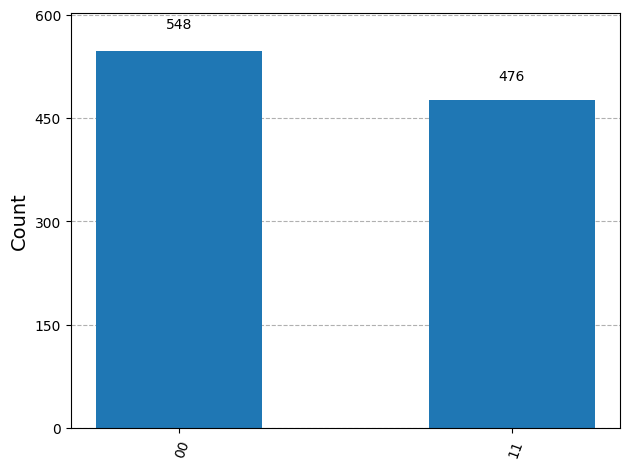

In [10]:
plot_histogram(counts3)

**What kind of state does this create?**

This creates an entangled Bell state. This demonstrates entanglement because the qubits are no longer independent. The measurement result of qubit 0 is perfectly correlated with the result of qubit 1: if you measure qubit 0 and get 0, you know qubit 1 will also be 0. If you measure qubit 0 as 1, qubit 1 is guaranteed to be 1.

# ***TASK 4***

In [11]:
job4 = simulator.run(compiled_circuit3, shots=4096)
result4 = job4.result()
counts4 = result4.get_counts()
print("Measurement Results:", counts4)
print("\nCircuit Diagram:")
print(qc3.draw('text'))

Measurement Results: {'00': 2098, '11': 1998}

Circuit Diagram:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


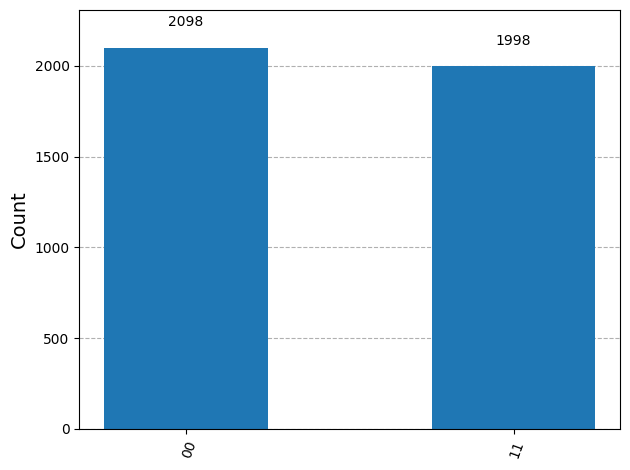

In [12]:
plot_histogram(counts4)

**Does the distribution become more stable?**

Yes.The percentage distribution becomes a more stable and accurate reflection of the true 50/50 probability.

# ***TASK 5***

Visualizing Statevector (pre-measurement):
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


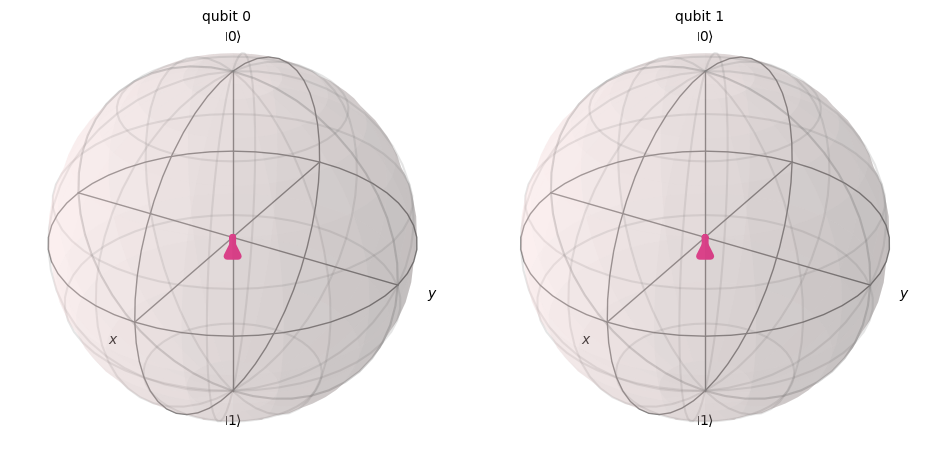

In [13]:
from qiskit.visualization import plot_bloch_multivector

qc5 = QuantumCircuit(2)
qc5.h(0)
qc5.cx(0, 1)
qc5.save_statevector()
compiled_circuit5 = transpile(qc5, simulator)
job5 = simulator.run(compiled_circuit5)
result5 = job5.result()
statevector5 = result5.get_statevector(qc5)
print("Visualizing Statevector (pre-measurement):")
print(statevector5)
plot_bloch_multivector(statevector5)